## Multiple Linear Regression Task 2: Advertising and Sales

### Step 1: Import Libraries and Load Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\02-multiple-regression\advertising_and_sales_clean.csv")
df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


### Step 2: EDA + Preprocessing + Train test split

#### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [4]:
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [5]:
df.isnull().sum()

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64

In [6]:
df.shape

(4546, 5)

In [7]:
df["influencer"].value_counts()

influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

#### Preprocessing
- Applying Ordinal Encoding on influncer

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ordinal = OrdinalEncoder(categories=[["Nano", "Micro", "Macro", "Mega"]])

ordinal_data = df["influencer"].values.reshape(-1,1)

ordinal_encoded_data = ordinal.fit_transform(ordinal_data)
ordinal_encoded_data

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [2.],
       [1.]])

In [10]:
df["influencer"] = ordinal_encoded_data

In [11]:
df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,3.0,54732.76
1,13000.0,9237.76,2409.57,3.0,46677.90
2,41000.0,15886.45,2913.41,3.0,150177.83
3,83000.0,30020.03,6922.30,3.0,298246.34
4,15000.0,8437.41,1406.00,1.0,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,1.0,94685.87
4542,71000.0,20610.69,6545.57,0.0,249101.92
4543,44000.0,19800.07,5096.19,1.0,163631.46
4544,71000.0,17534.64,1940.87,2.0,253610.41


In [12]:
df.influencer.value_counts()

influencer
3.0    1152
1.0    1148
0.0    1134
2.0    1112
Name: count, dtype: int64

<Axes: xlabel='influencer', ylabel='sales'>

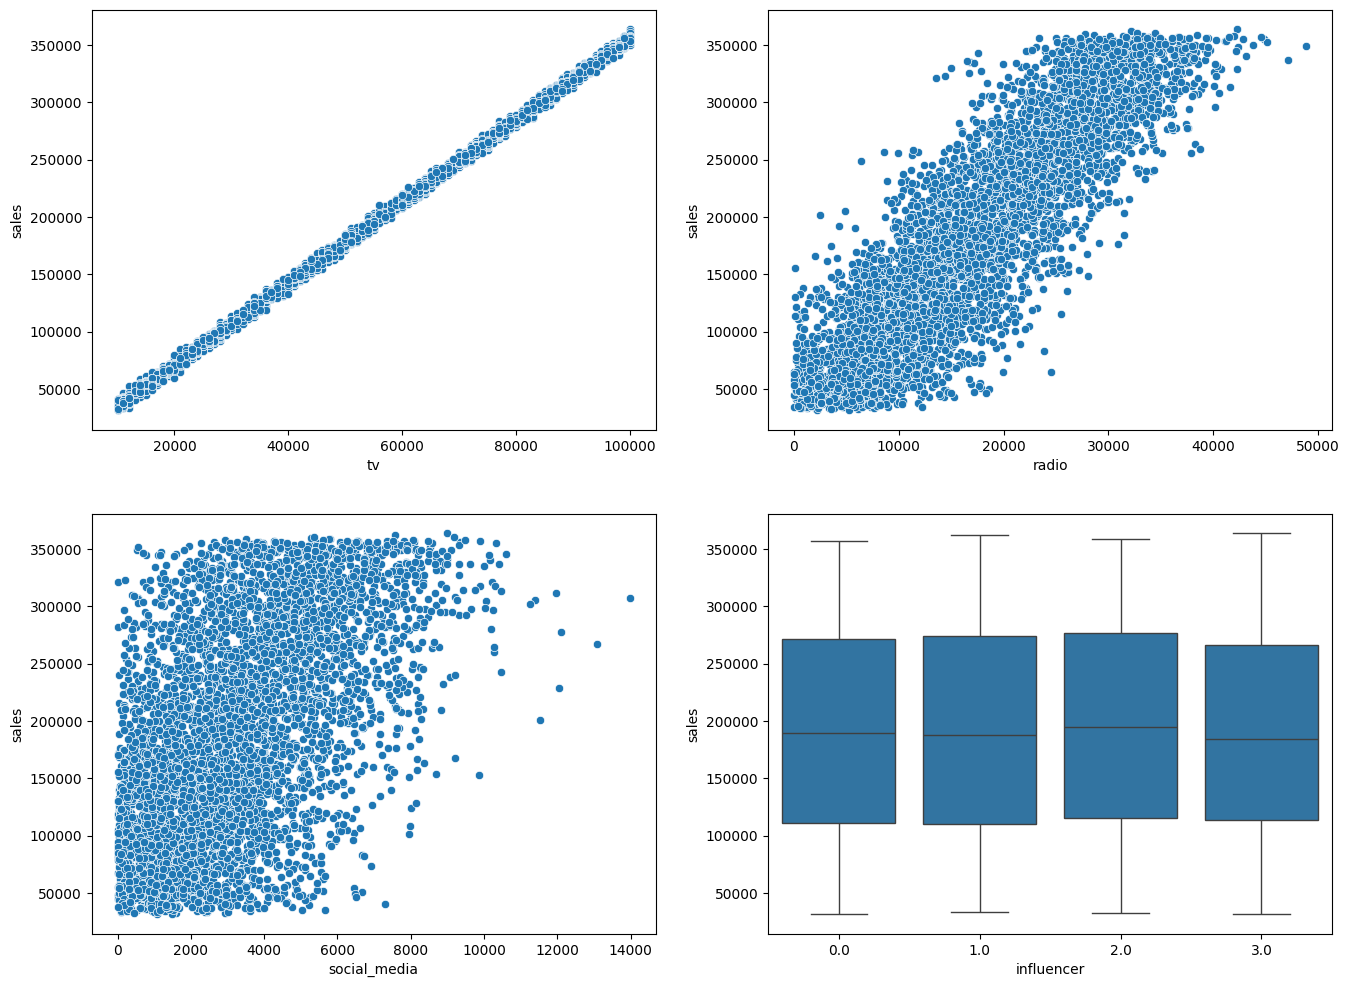

In [13]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(16,12))

sns.scatterplot(data=df, x="tv", y="sales", ax=ax1[0])
sns.scatterplot(data=df, x="radio", y="sales", ax=ax1[1])
sns.scatterplot(data=df, x="social_media", y='sales', ax=ax2[0])
sns.boxplot(data=df, x='influencer', y='sales', ax=ax2[1])



<Axes: xlabel='social_media', ylabel='sales'>

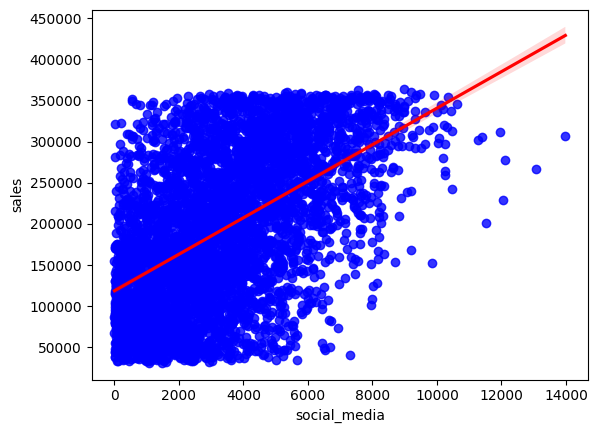

In [20]:
sns.regplot(data=df, x="social_media", y='sales', color="blue", line_kws={"color": "red"})

#### Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("sales", axis=1), df["sales"], test_size=0.2, random_state=42)

### Step 3: Train the Model

In [15]:
lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

### Step 4: Predict and Evaluate the Model

In [16]:
y_pred = lr.predict(X_test)

print("Acuracy ",r2_score(y_test, y_pred=y_pred)*100,"%")

Acuracy  99.90104226377055 %


### Step 5: Y_intercept and Slope

In [17]:
# tv	    radio	social_media	influencer	sales
# 16000.0	6566.23	2907.98	        3.0	        54732.76

m1 = lr.coef_[0]
m2 = lr.coef_[1]
m3 = lr.coef_[2]
m4 = lr.coef_[3]

b0 = lr.intercept_

b1 = 16000          # TV:       10, 000 - 100, 000
b2 = 6566.23       # Radio:    0.68 - 48871.16
b3 =  2907.98           # social media:  0.03 - 13981.66
b4 = 3              # Influencer:    0 - 3


y = b0 + m1*b1 + m2*b2 + m3*b3 + m4*b4 

print(f"TV: {b1}, Radio: {b2}, Social Media: {b3}, Influencer: {b4},\n Predicted Sales: {y}")

TV: 16000, Radio: 6566.23, Social Media: 2907.98, Influencer: 3,
 Predicted Sales: 56857.96807588531


#### End of Task